# 16th May

In [1]:
import tweepy
import pandas as pd
import numpy as np
import re
import seaborn as sns
import matplotlib.pyplot as plt
from textblob import TextBlob
from tweepy.auth import OAuthHandler

In [2]:
path = r'/home/edmundotome/Documents/Github Projects/LogAPItwitter.csv'
log = pd.read_csv(path)

In [3]:
consumerKey = log['API Key'][0]
consumerSecret = log['API Key Secret'][0]

accessToken = log['Access Token'][0]
accessTokenSecret = log['Access Token Secret'][0]

In [4]:
auth = OAuthHandler(consumerKey, consumerSecret)
auth.set_access_token(accessToken, accessTokenSecret)

api = tweepy.API(auth, wait_on_rate_limit=True)

In [5]:
#gather 1000 tweets about Bitcoin and filter out any retweets 'RT'
search_term = '#bitcoin -filter:retweets'

#create a cursor object
tweets = tweepy.Cursor(api.search, q=search_term, lang='en', since='2021-05-16', tweet_mode='extended').items(1000)

#store tweets in a variable and get the full text
all_tweets = [tweet.full_text for tweet in tweets]

In [6]:
#create a dataframe to store the tweets with a column called 'tweets'
df = pd.DataFrame(all_tweets, columns=['Tweets'])
#show the first 5 rows of data
df.head(10)

Tweets
0  @PhantasmaChain #soul is about to explode! #Eu...
1  Are Bonds Risky?  https://t.co/qTCBse3MGP #bon...
2                                #Bitcoin is freedom
3  #linkedin #twitter #facebook #instagram #tumbl...
4  @circleofninjas @davidgokhshtein $CISLA 🏝️ The...
5  #linkedin #twitter #facebook #instagram #tikto...
6  #linkedin #twitter #facebook #instagram #bitco...
7  #linkedin #twitter #facebook #instagram #doge ...
8  Dak, McCarthy defend QB draw that ended game h...
9  #Bitcoin levels and plan for 01/17/21. $42,800...

In [7]:
#create a function to clean the tweets 
def cleanTwt(twt):
  twt = re.sub('#bitcoin', 'bitcoin', twt) #removes the '#' from bitcoin
  twt = re.sub('#Bitcoin', 'Bitcoin', twt)
  twt = re.sub('#BTC', 'Bitcoin', twt)
  twt = re.sub('#[A-Za-z0-9]+', '', twt) #removes any strings with a '#'
  twt = re.sub('\\n', '', twt) #removes the '\n' string
  twt = re.sub('https?:\/\/\S+', '', twt) #removes any hyperlinks
  return twt

In [8]:
#clean the tweets
df['Cleaned Tweets'] = df['Tweets'].apply(cleanTwt)
#show the dataset
df.head()

Tweets  \
0  @PhantasmaChain #soul is about to explode! #Eu...   
1  Are Bonds Risky?  https://t.co/qTCBse3MGP #bon...   
2                                #Bitcoin is freedom   
3  #linkedin #twitter #facebook #instagram #tumbl...   
4  @circleofninjas @davidgokhshtein $CISLA 🏝️ The...   

                                      Cleaned Tweets  
0  @PhantasmaChain  is about to explode!     Bitcoin  
1                     Are Bonds Risky?    Bitcoin     
2                                 Bitcoin is freedom  
3                      bitcoin   on orders over $99   
4  @circleofninjas @davidgokhshtein $CISLA 🏝️ The...

In [9]:
#create a function to get subjetivity
def getSubjectivity(twt):
  return TextBlob(twt).sentiment.subjectivity
#create a function to get polarity
def getPolarity(twt):
  return TextBlob(twt).sentiment.polarity

#create two new columns called 'Subjetivity' and 'Polarity'
df['Subjetivity'] = df['Cleaned Tweets'].apply(getSubjectivity)

df['Polarity'] = df['Cleaned Tweets'].apply(getPolarity)

df.head(15)

Tweets  \
0   @PhantasmaChain #soul is about to explode! #Eu...   
1   Are Bonds Risky?  https://t.co/qTCBse3MGP #bon...   
2                                 #Bitcoin is freedom   
3   #linkedin #twitter #facebook #instagram #tumbl...   
4   @circleofninjas @davidgokhshtein $CISLA 🏝️ The...   
5   #linkedin #twitter #facebook #instagram #tikto...   
6   #linkedin #twitter #facebook #instagram #bitco...   
7   #linkedin #twitter #facebook #instagram #doge ...   
8   Dak, McCarthy defend QB draw that ended game h...   
9   #Bitcoin levels and plan for 01/17/21. $42,800...   
10  @airdropinspect Good project and good teamwork...   
11  Current Price of BITCOIN (BTC): $ 42734, 24H C...   
12  Experts suggest that you and your partner deve...   
13  if you invest time/money doesn't work while yo...   
14  It’s been a busy turn of the year for the cryp...   

                                       Cleaned Tweets  Subjetivity  Polarity  
0   @PhantasmaChain  is about to explode!     Bitcoin     0.000000  0.000000  
1                      Are Bonds Risky?    Bitcoin        0.000000  0.000000  
2                                  Bitcoin is freedom     0.000000  0.000000  
3                       bitcoin   on orders over $99      0.000000  0.000000  
4   @circleofninjas @davidgokhshtein $CISLA 🏝️ The...     0.577381  0.069345  
5                  bitcoin  Enjoy $10 off Orders o...     0.500000  0.400000  
6       bitcoin             SAVE BIG ON AIRPORT PA...     0.100000  0.000000  
7                  bitcoin  on purchases over $25 ...     0.000000  0.000000  
8   Dak, McCarthy defend QB draw that ended game  ...     0.400000 -0.400000  
9   Bitcoin levels and plan for 01/17/21. $42,800 ...     0.608333  0.041667  
10  @airdropinspect Good project and good teamwork...     0.403750  0.302500  
11  Current Price of BITCOIN (BTC): $ 42734, 24H C...     0.575000  0.187500  
12  Experts suggest that you and your partner deve...     0.500000  0.000000  
13  if you invest time/money doesn't work while yo...     0.062500  0.150000  
14  It’s been a busy turn of the year for the cryp...     0.300000  0.100000

In [10]:
#create a function to get sentiment text 
def getSentiment(score):
  if score < 0:
    return 'Negative'
  elif score == 0:
    return 'Neutral'
  else:
    return 'Positive'


In [11]:
#create a column to store the text sentiment
df['Sentiment'] = df['Polarity'].apply(getSentiment)

df.head(15)

Tweets  \
0   @PhantasmaChain #soul is about to explode! #Eu...   
1   Are Bonds Risky?  https://t.co/qTCBse3MGP #bon...   
2                                 #Bitcoin is freedom   
3   #linkedin #twitter #facebook #instagram #tumbl...   
4   @circleofninjas @davidgokhshtein $CISLA 🏝️ The...   
5   #linkedin #twitter #facebook #instagram #tikto...   
6   #linkedin #twitter #facebook #instagram #bitco...   
7   #linkedin #twitter #facebook #instagram #doge ...   
8   Dak, McCarthy defend QB draw that ended game h...   
9   #Bitcoin levels and plan for 01/17/21. $42,800...   
10  @airdropinspect Good project and good teamwork...   
11  Current Price of BITCOIN (BTC): $ 42734, 24H C...   
12  Experts suggest that you and your partner deve...   
13  if you invest time/money doesn't work while yo...   
14  It’s been a busy turn of the year for the cryp...   

                                       Cleaned Tweets  Subjetivity  Polarity  \
0   @PhantasmaChain  is about to explode!     Bitcoin     0.000000  0.000000   
1                      Are Bonds Risky?    Bitcoin        0.000000  0.000000   
2                                  Bitcoin is freedom     0.000000  0.000000   
3                       bitcoin   on orders over $99      0.000000  0.000000   
4   @circleofninjas @davidgokhshtein $CISLA 🏝️ The...     0.577381  0.069345   
5                  bitcoin  Enjoy $10 off Orders o...     0.500000  0.400000   
6       bitcoin             SAVE BIG ON AIRPORT PA...     0.100000  0.000000   
7                  bitcoin  on purchases over $25 ...     0.000000  0.000000   
8   Dak, McCarthy defend QB draw that ended game  ...     0.400000 -0.400000   
9   Bitcoin levels and plan for 01/17/21. $42,800 ...     0.608333  0.041667   
10  @airdropinspect Good project and good teamwork...     0.403750  0.302500   
11  Current Price of BITCOIN (BTC): $ 42734, 24H C...     0.575000  0.187500   
12  Experts suggest that you and your partner deve...     0.500000  0.000000   
13  if you invest time/money doesn't work while yo...     0.062500  0.150000   
14  It’s been a busy turn of the year for the cryp...     0.300000  0.100000   

   Sentiment  
0    Neutral  
1    Neutral  
2    Neutral  
3    Neutral  
4   Positive  
5   Positive  
6    Neutral  
7    Neutral  
8   Negative  
9   Positive  
10  Positive  
11  Positive  
12   Neutral  
13  Positive  
14  Positive

/home/edmundotome/anaconda3/envs/Signal-Processing/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


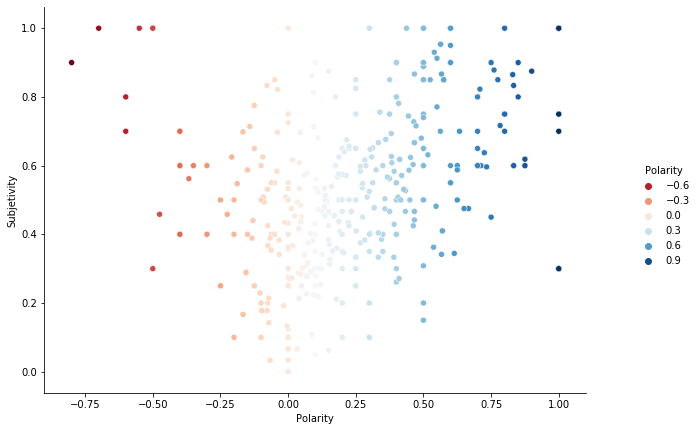

In [12]:
ax = sns.relplot(df['Polarity'], df['Subjetivity'], hue = df['Polarity'], palette='RdBu')
ax.fig.set_size_inches(10,6)

norm = plt.Normalize(df['Polarity'].min(), df['Polarity'].max())
sm = plt.cm.ScalarMappable(cmap="RdBu", norm=norm)
sm.set_array([])

plt.show()

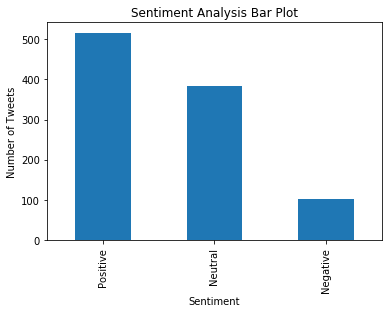

In [13]:
#create a barchar to show the count of positive, neutral and negative sentiments
df['Sentiment'].value_counts().plot(kind='bar')
plt.title('Sentiment Analysis Bar Plot')
plt.xlabel('Sentiment')
plt.ylabel('Number of Tweets')
plt.show()

In [14]:
df['Sentiment'].value_counts()

Positive    516
Neutral     383
Negative    101
Name: Sentiment, dtype: int64

In [15]:
val_count = list(df['Sentiment'].value_counts())
val_count

[516, 383, 101]

In [16]:
lst_df = list(df['Sentiment'].value_counts())
lst_df

[516, 383, 101]

In [17]:
dfs = pd.read_csv("f_sentiments.csv")
  
# updating the column value/data
dfs.loc[6, 'Sentiment'] = 'day 7'
dfs.loc[6, 'Positive'] = lst_df[0]
dfs.loc[6, 'Neutral'] = lst_df[1]
dfs.loc[6, 'Negative'] = lst_df[2]
  
# writing into the file
dfs.to_csv("f_sentiments.csv", index=False)
  
print(dfs)

  Sentiment  Positive  Neutral  Negative
0     day 1     540.0    414.0      46.0
1     day 2     542.0    412.0      46.0
2     day 3     578.0    377.0      45.0
3     day 4     530.0    382.0      88.0
4     day 5     601.0    351.0      48.0
5     day 6     603.0    348.0      49.0
6     day 7     516.0    383.0     101.0
